<a href="https://colab.research.google.com/github/Akil8055/Machine-learning/blob/main/LAB5_AP23110011515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Introduction

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [ ]:
def generate_examples(num=1000):
    w = [1.0, -3.0]
    b = 1.0

    X=np.random.randn(num, 2)
    w=np.reshape(w,(2,1))
    y=b+np.dot(X,w)+np.random.randn()
    y=np.reshape(y,(num,1))
    return X,y

In [ ]:
X,y=generate_examples()

In [ ]:
print(X.shape,y.shape)

(1000, 2) (1000, 1)


In [ ]:
print(X[0],y[0])

[ 1.91138726 -0.2435484 ] [3.35685385]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to
$
\begin{equation}
min(J)
\end{equation}
$

In [ ]:
class Model:
    def __init__(self,num_features):
        self.num_features=num_features
        self.w=np.random.randn(num_features,1)
        self.b=np.random.randn()


In [ ]:
model = Model(2)
print(model.w)
print(model.b)

[[-0.26884459]
 [ 1.05744838]]
0.5120549548803868


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [ ]:
class Model(Model):
    def forward_pass(self,x):
        y_hat = self.b+np.dot(x,self.w)
        return y_hat

In [ ]:
y_hat=Model(2).forward_pass(X)
print(y_hat.shape,y_hat[0])

(1000, 1) [2.34120071]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [ ]:
class Model(Model):
    def compute_loss(self,y_hat,y_true):
        return np.sum(np.square(y_true-y_hat))/(2*y_hat.shape[0])

In [ ]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat,y)

In [ ]:
print(loss)

6.9119268833321295


# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [ ]:
class Model(Model):
    def backward_pass(self,X,y_true,y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat-y_true)
        dw = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true),X),axis=0)
        return dw,db



In [ ]:
model = Model(2)
X,y=generate_examples()
y_hat=model.forward_pass(X)
dw,db=model.backward_pass(X,y,y_hat)

In [ ]:
print(dw,db)

[-0.88051378  2.21129648] -1.6305597465790715


# Task 7: Update Parameters

In [ ]:
class Model(Model):
    def update_param(self,dw,db,lr):
        self.w=self.w-lr*np.reshape(dw,(self.num_features,1))
        self.b=self.b-lr*db


# Task 8: Training Loop

In [ ]:
class Model(Model):
    def train(self,x_train,y_train,iterations,lr):
        losses = []
        for i in range (0,iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat,y_train)
            dw,db=self.backward_pass(x_train,y_train,y_hat)
            self.update_param(dw,db,lr)
            losses.append(loss)
            if i%int(iterations/10):
                print('Iter : {}, Loss {:.4f}'.format(i,loss))
        return losses

In [ ]:
model = Model(2)


In [ ]:
x_train,y_train=generate_examples()


In [ ]:
losses = model.train(x_train,y_train,1000,3e-3)


Iter : 1, Loss 6.3977
Iter : 2, Loss 6.3577
Iter : 3, Loss 6.3178
Iter : 4, Loss 6.2782
Iter : 5, Loss 6.2389
Iter : 6, Loss 6.1998
Iter : 7, Loss 6.1610
Iter : 8, Loss 6.1224
Iter : 9, Loss 6.0840
Iter : 10, Loss 6.0459
Iter : 11, Loss 6.0080
Iter : 12, Loss 5.9704
Iter : 13, Loss 5.9330
Iter : 14, Loss 5.8958
Iter : 15, Loss 5.8589
Iter : 16, Loss 5.8222
Iter : 17, Loss 5.7857
Iter : 18, Loss 5.7495
Iter : 19, Loss 5.7135
Iter : 20, Loss 5.6777
Iter : 21, Loss 5.6421
Iter : 22, Loss 5.6068
Iter : 23, Loss 5.5717
Iter : 24, Loss 5.5368
Iter : 25, Loss 5.5021
Iter : 26, Loss 5.4676
Iter : 27, Loss 5.4334
Iter : 28, Loss 5.3994
Iter : 29, Loss 5.3656
Iter : 30, Loss 5.3320
Iter : 31, Loss 5.2986
Iter : 32, Loss 5.2654
Iter : 33, Loss 5.2324
Iter : 34, Loss 5.1996
Iter : 35, Loss 5.1671
Iter : 36, Loss 5.1347
Iter : 37, Loss 5.1026
Iter : 38, Loss 5.0706
Iter : 39, Loss 5.0389
Iter : 40, Loss 5.0073
Iter : 41, Loss 4.9760
Iter : 42, Loss 4.9448
Iter : 43, Loss 4.9139
Iter : 44, Loss 4.88

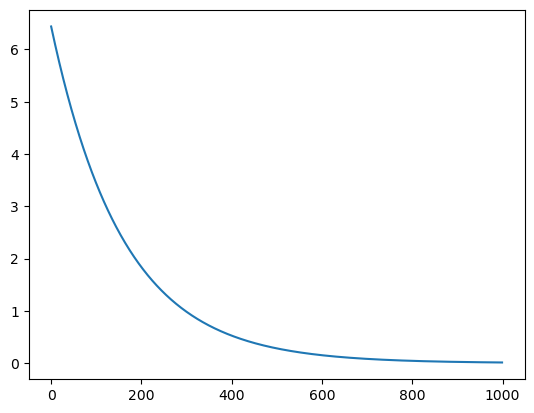

In [ ]:
plt.plot(losses)

# Task 9: Predictions

In [ ]:
model_untrained = Model(2)

x_test,y_test = generate_examples(501)
print(x_test.shape,y_test.shape)

(501, 2) (501, 1)


In [ ]:
preds_untrained=model_untrained.forward_pass(x_test)
pred_trained=model.forward_pass(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

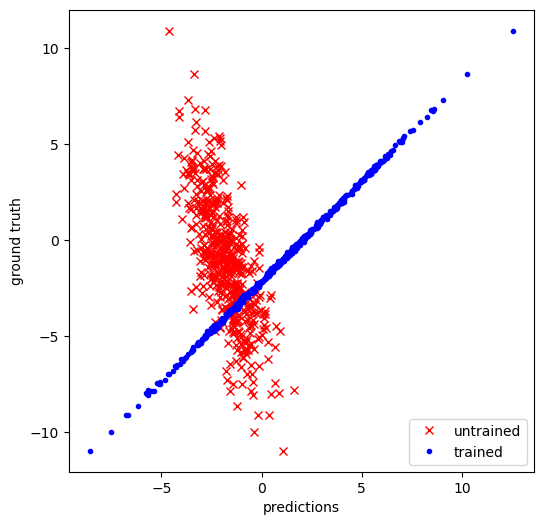

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained,y_test,'rx',label="untrained")
plt.plot(pred_trained,y_test,'b.',label="trained")
plt.legend()
plt.xlabel("predictions")

plt.ylabel("ground truth")
plt.show